In [1]:
import configparser
import requests
from datetime import datetime
import pandas as pd

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')
api_key =config.get('YouTube_API', 'api_key')
base_url = "https://www.googleapis.com/youtube/v3/"

In [3]:
def get_html_to_json(path):
    """組合 URL 後 GET 網頁並轉換成 JSON"""
    api_url = f"{base_url}{path}&key={api_key}"
    r = requests.get(api_url)
    if r.status_code == requests.codes.ok:
        data = r.json()
    else:
        data = None
    return data

In [4]:
def get_channel_uploads_id(channel_id, part='contentDetails'):
        """取得頻道上傳影片清單的ID"""
        path = f'channels?part={part}&id={channel_id}'
        data = get_html_to_json(path)
        try:
            uploads_id = data['items'][0]['contentDetails']['relatedPlaylists']['uploads']
        except KeyError:
            uploads_id = None
        return uploads_id

# 數據來源為Jay Lee Painting的YouTube頻道

In [5]:
get_channel_uploads_id('UCHm9SiOLG8UoBT8STWY5mVA')

'UUHm9SiOLG8UoBT8STWY5mVA'

In [6]:
def get_playlist(playlist_id, part='contentDetails', max_results=50):
        """取得影片清單ID中的影片"""
        path = f'playlistItems?part={part}&playlistId={playlist_id}&maxResults={max_results}'
        data = get_html_to_json(path)
        if not data:
            return []

        video_ids = []
        for data_item in data['items']:
            video_ids.append(data_item['contentDetails']['videoId'])
        return video_ids

In [7]:
len(get_playlist('UUHm9SiOLG8UoBT8STWY5mVA'))

50

In [8]:
playlists = get_playlist('UUHm9SiOLG8UoBT8STWY5mVA')

In [9]:
def get_video(video_id, part='snippet,statistics'):
        """取得影片資訊"""
        path = f'videos?part={part}&id={video_id}'
        data = get_html_to_json(path)
        if not data:
            return {}
        # 以下整理並提取需要的資料
        data_item = data['items'][0]

        try:
            time_ = datetime.strptime(data_item['snippet']['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
        except ValueError:
            # 日期格式錯誤
            time_ = None

        url_ = f"https://www.youtube.com/watch?v={data_item['id']}"

        info = {
#             'id': data_item['id'],
#             'channelTitle': data_item['snippet']['channelTitle'],
#             'publishedAt': time_,
            'video_url': url_,
            'title': data_item['snippet']['title'],
#             'description': data_item['snippet']['description'],
            'likeCount': data_item['statistics']['likeCount'],
            'commentCount': data_item['statistics']['commentCount'],
            'viewCount': data_item['statistics']['viewCount']
        }
        return info

In [10]:
get_video('PqWH95EMmNM')

{'video_url': 'https://www.youtube.com/watch?v=PqWH95EMmNM',
 'title': 'How to Draw a Couple Walking in the Rain / Red Acrylic Painting Techniques',
 'likeCount': '2358',
 'commentCount': '143',
 'viewCount': '104866'}

In [11]:
video_url_array = []
title_array = []
likeCount_array = []
commentCount_array = []
viewCount_array = []

for playlist in playlists:
    video_data = get_video(playlist)
    
    video_url_array.append(video_data['video_url'])
    title_array.append(video_data['title'])
    likeCount_array.append(video_data['likeCount'])
    commentCount_array.append(video_data['commentCount'])
    viewCount_array.append(video_data['viewCount'])

In [12]:
df = pd.DataFrame()
df['video_url'] = video_url_array
df['title'] = title_array
df['likeCount'] = likeCount_array
df['commentCount'] = commentCount_array
df['viewCount'] = viewCount_array
df

,video_url,title,likeCount,commentCount,viewCount
0,https://www.youtube.com/watch?v=PqWH95EMmNM,How to Draw a Couple Walking in the Rain / Red...,2358,143,104866
1,https://www.youtube.com/watch?v=S14nS2KGUZI,Painting a Country Road / Acrylic Painting Tec...,5004,143,228965
2,https://www.youtube.com/watch?v=RjlajaLYvqk,Simple Watercolor Painting for Beginners (Easy),2420,101,95156
3,https://www.youtube.com/watch?v=Gn3eE4jaKRA,How to Draw Water Reflection Effect / Acrylic ...,12358,325,760640
4,https://www.youtube.com/watch?v=rd_SwWWKy7g,Painting Brilliant Pink Forest / Acrylic Paint...,12490,363,1115131
5,https://www.youtube.com/watch?v=M5eynslZhKU,Painting a Dandelion Field / Acrylic Painting ...,17403,345,1751596
6,https://www.youtube.com/watch?v=RC3p-MW7ZZM,Painting a Tree / Easy Acrylic Painting Technique,5914,244,321694
7,https://www.youtube.com/watch?v=wlmd5812RjM,How to Paint Two Flowers / No War,4554,243,103594
8,https://www.youtube.com/watch?v=GANrQfmSJcg,Iron Scrubber Painting / How to Paint Leaves /...,29792,579,2644313
9,https://www.youtube.com/watch?v=SqNtzR-_muw,Painting Forest / Acrylic Painting Technique /...,13735,418,978930


In [13]:
max_likeCount = 0
for likeCount in df['likeCount']:
    if(float(max_likeCount) < float(likeCount)):
        max_likeCount = float(likeCount)
    else:
        pass
    
max_commentCount = 0
for commentCount in df['commentCount']:
    if(float(max_commentCount) < float(commentCount)):
        max_commentCount = float(commentCount)
    else:
        pass
    
max_viewCount = 0
for viewCount in df['viewCount']:
    if(float(max_viewCount) < float(viewCount)):
        max_viewCount = float(viewCount)
    else:
        pass

In [14]:
likeCount_score_array = []
for likeCount in df['likeCount']:
    likeCount_score_array.append(round(float(likeCount)/float(max_likeCount)*100, 2))
    
commentCount_score_array = []
for commentCount in df['commentCount']:
    commentCount_score_array.append(round(float(commentCount)/float(max_commentCount)*100, 2))
    
viewCount_score_array = []
for viewCount in df['viewCount']:
    viewCount_score_array.append(round(float(viewCount)/float(max_viewCount)*100, 2))
    
df['likeCount_score'] = likeCount_score_array
df['commentCount_score'] = commentCount_score_array
df['viewCount_score'] = viewCount_score_array
df

,video_url,title,likeCount,commentCount,viewCount,likeCount_score,commentCount_score,viewCount_score
0,https://www.youtube.com/watch?v=PqWH95EMmNM,How to Draw a Couple Walking in the Rain / Red...,2358,143,104866,0.25,0.96,0.15
1,https://www.youtube.com/watch?v=S14nS2KGUZI,Painting a Country Road / Acrylic Painting Tec...,5004,143,228965,0.53,0.96,0.32
2,https://www.youtube.com/watch?v=RjlajaLYvqk,Simple Watercolor Painting for Beginners (Easy),2420,101,95156,0.26,0.68,0.13
3,https://www.youtube.com/watch?v=Gn3eE4jaKRA,How to Draw Water Reflection Effect / Acrylic ...,12358,325,760640,1.32,2.18,1.06
4,https://www.youtube.com/watch?v=rd_SwWWKy7g,Painting Brilliant Pink Forest / Acrylic Paint...,12490,363,1115131,1.33,2.43,1.56
5,https://www.youtube.com/watch?v=M5eynslZhKU,Painting a Dandelion Field / Acrylic Painting ...,17403,345,1751596,1.85,2.31,2.45
6,https://www.youtube.com/watch?v=RC3p-MW7ZZM,Painting a Tree / Easy Acrylic Painting Technique,5914,244,321694,0.63,1.64,0.45
7,https://www.youtube.com/watch?v=wlmd5812RjM,How to Paint Two Flowers / No War,4554,243,103594,0.49,1.63,0.14
8,https://www.youtube.com/watch?v=GANrQfmSJcg,Iron Scrubber Painting / How to Paint Leaves /...,29792,579,2644313,3.17,3.88,3.69
9,https://www.youtube.com/watch?v=SqNtzR-_muw,Painting Forest / Acrylic Painting Technique /...,13735,418,978930,1.46,2.80,1.37


# 權重
## likeCount 喜歡數 : 權重= 0.4
## commentCount 留言數 : 權重= 0.5
## viewCount 觀看數 : 權重= 0.1

In [15]:
final_score_array = []
for i in range(len(df)):
    final_score_array.append(df['likeCount_score'][i]*0.4 + df['commentCount_score'][i]*0.5 + df['viewCount_score'][i]*0.1)
    
df['final_score'] = final_score_array
df

,video_url,title,likeCount,commentCount,viewCount,likeCount_score,commentCount_score,viewCount_score,final_score
0,https://www.youtube.com/watch?v=PqWH95EMmNM,How to Draw a Couple Walking in the Rain / Red...,2358,143,104866,0.25,0.96,0.15,0.595
1,https://www.youtube.com/watch?v=S14nS2KGUZI,Painting a Country Road / Acrylic Painting Tec...,5004,143,228965,0.53,0.96,0.32,0.724
2,https://www.youtube.com/watch?v=RjlajaLYvqk,Simple Watercolor Painting for Beginners (Easy),2420,101,95156,0.26,0.68,0.13,0.457
3,https://www.youtube.com/watch?v=Gn3eE4jaKRA,How to Draw Water Reflection Effect / Acrylic ...,12358,325,760640,1.32,2.18,1.06,1.724
4,https://www.youtube.com/watch?v=rd_SwWWKy7g,Painting Brilliant Pink Forest / Acrylic Paint...,12490,363,1115131,1.33,2.43,1.56,1.903
5,https://www.youtube.com/watch?v=M5eynslZhKU,Painting a Dandelion Field / Acrylic Painting ...,17403,345,1751596,1.85,2.31,2.45,2.140
6,https://www.youtube.com/watch?v=RC3p-MW7ZZM,Painting a Tree / Easy Acrylic Painting Technique,5914,244,321694,0.63,1.64,0.45,1.117
7,https://www.youtube.com/watch?v=wlmd5812RjM,How to Paint Two Flowers / No War,4554,243,103594,0.49,1.63,0.14,1.025
8,https://www.youtube.com/watch?v=GANrQfmSJcg,Iron Scrubber Painting / How to Paint Leaves /...,29792,579,2644313,3.17,3.88,3.69,3.577
9,https://www.youtube.com/watch?v=SqNtzR-_muw,Painting Forest / Acrylic Painting Technique /...,13735,418,978930,1.46,2.80,1.37,2.121


In [16]:
max_final_score = 0
min_final_score = 100

for final_score in df['final_score']:
    if(float(max_final_score) < float(final_score)):
        max_final_score = float(final_score)
    else:
        pass
    
    if(float(min_final_score) > float(final_score)):
        min_final_score = float(final_score)
    else:
        pass

In [17]:
max_final_score

100.0

In [18]:
min_final_score

0.4570000000000001

# 最受歡迎的影片為以下

In [19]:
df[df['final_score'] == max_final_score]

,video_url,title,likeCount,commentCount,viewCount,likeCount_score,commentCount_score,viewCount_score,final_score
43,https://www.youtube.com/watch?v=nmZWfdG0zYA,Painting a Forest / Easy Acrylic Painting Tech...,938799,14913,71603085,100.0,100.0,100.0,100.0


# 最不受歡迎的影片為以下

In [20]:
df[df['final_score'] == min_final_score]

,video_url,title,likeCount,commentCount,viewCount,likeCount_score,commentCount_score,viewCount_score,final_score
2,https://www.youtube.com/watch?v=RjlajaLYvqk,Simple Watercolor Painting for Beginners (Easy),2420,101,95156,0.26,0.68,0.13,0.457


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

<BarContainer object of 50 artists>

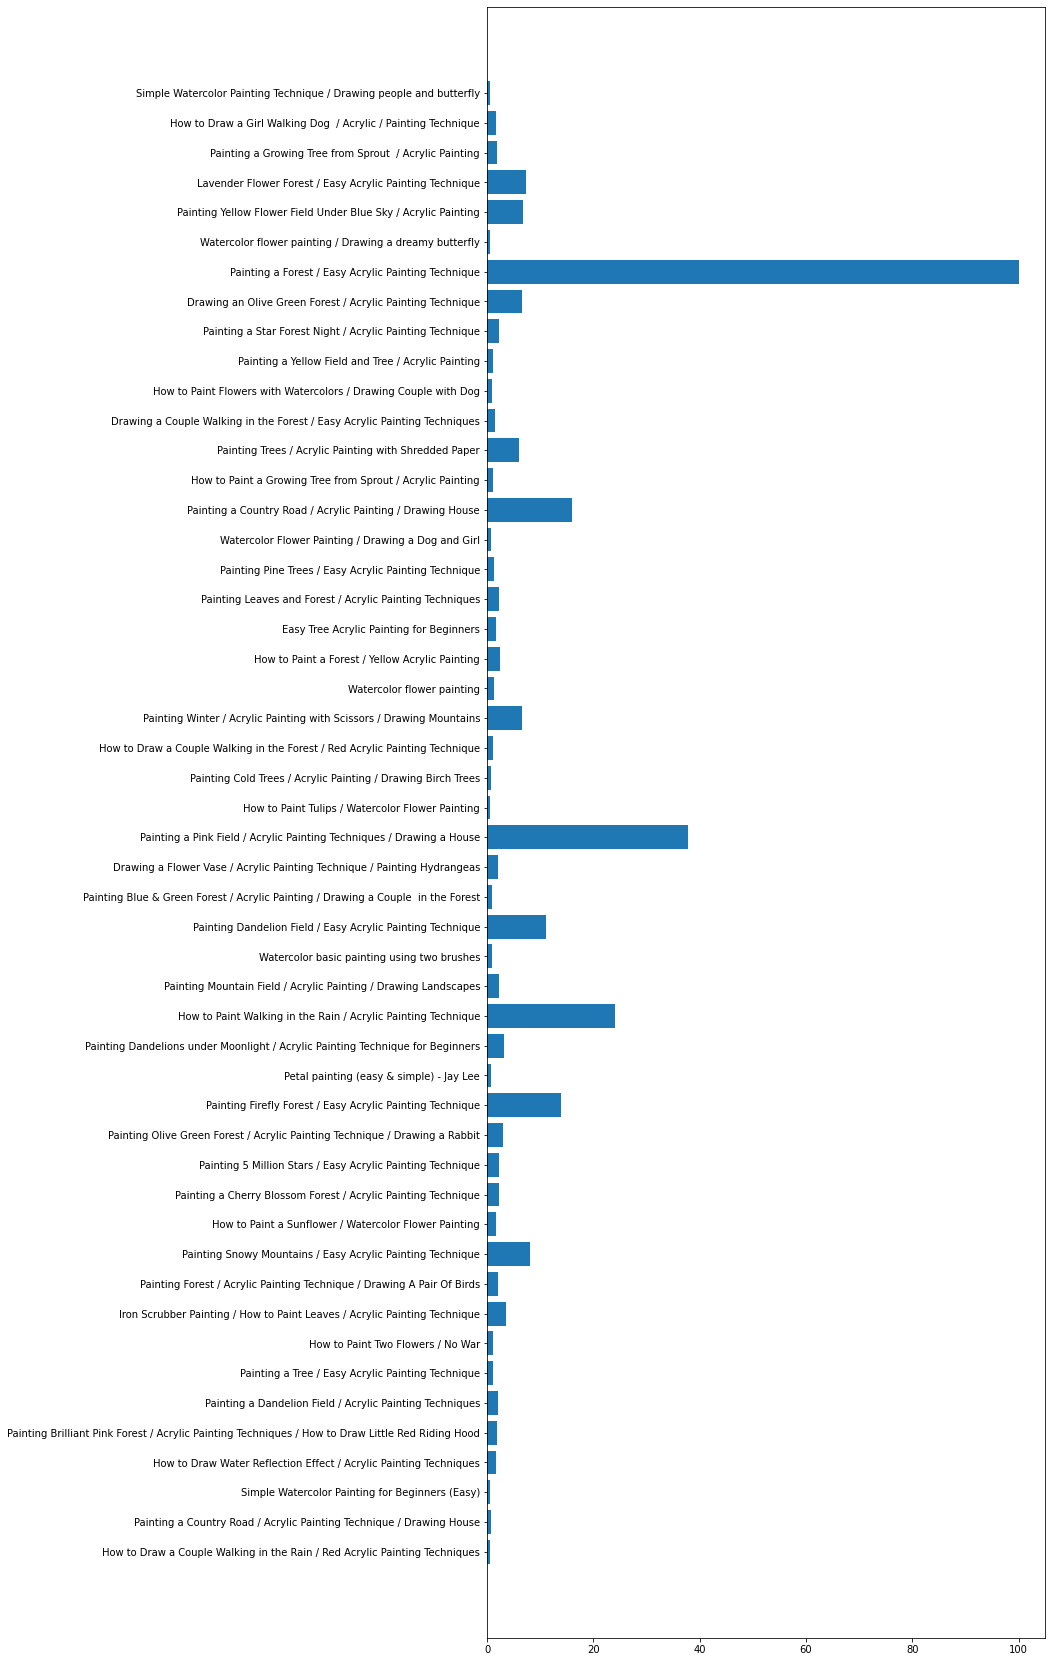

In [24]:
x = df['title']
y = df['final_score']

fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(x, y)

In [22]:
# 存CSV
filename = 'popularYoutubeVideoAnalyze.csv'
df.to_csv(filename,index=False)